# 线性拟合

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('aapl.csv', header=None, usecols=[1, 6], names=['date', 'close'])
data.head()

,date,close
0,28-01-2011,336.10
1,31-01-2011,339.32
2,01-02-2011,345.03
3,02-02-2011,344.32
4,03-02-2011,343.44


In [11]:
# 整理时间字段
def func(d):
    s = '-'.join(d.split('-')[::-1]) 
    return pd.to_datetime(s)
data['date'] = data['date'].apply(func)
data.head()

,date,close
0,2011-01-28,336.10
1,2011-01-31,339.32
2,2011-02-01,345.03
3,2011-02-02,344.32
4,2011-02-03,343.44


<Axes: xlabel='date'>

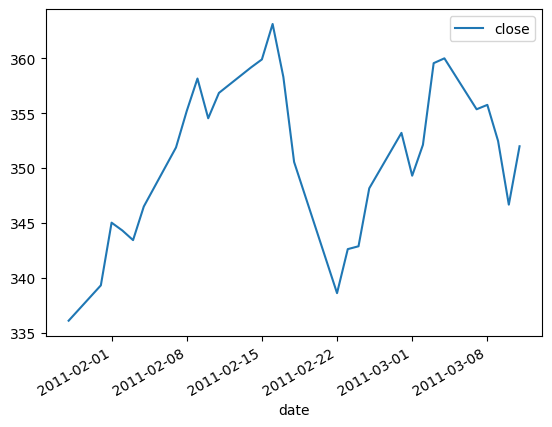

In [14]:
data.plot(x='date', y='close')

In [15]:
# 整理A与B， 计算x，求得趋势线的斜率与截距  k与b
# 将data中的date列转换为datetime格式，并将其与pd.to_datetime("2011-01-01")比较，计算出days
dates = data["date"] - pd.to_datetime("2011-01-01")
days = dates.dt.days
# 创建A矩阵，其中包含days列和ones列，ones列的值为1
A = pd.DataFrame({"days": days, "ones": pd.Series(1, index=np.arange(days.size))})
# 获取B列
B = data["close"]

# 计算x，即斜率与截距
x = np.linalg.lstsq(A, B)[0]
k, b = x[0], x[1]  # 获取到直线方程的斜率与截距

C:\Users\Rubia\AppData\Local\Temp\ipykernel_20620\2131022786.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x = np.linalg.lstsq(A, B)[0]


<Axes: xlabel='date'>

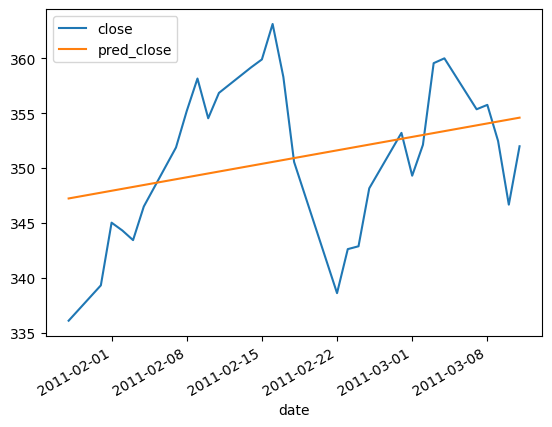

In [16]:
pred_close = k * days + b
data['pred_close'] = pred_close
data.plot(x='date', y=['close', 'pred_close'])